# Time Series Analysis for Energy Consumption

## Data Ingestion

### Power Generation by Fuel Type (ODS033)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load and prepare data
df = pd.read_parquet('ods033.parquet')
df.head()

,datetime,resolutioncode,fuelcode,generatedpower,totalgeneratedpower
0,2024-05-21 23:45:00+02:00,PT15M,NG,803.69,5138.16
1,2024-05-21 23:45:00+02:00,PT15M,Other,411.33,5138.16
2,2024-05-21 23:45:00+02:00,PT15M,CP,0.00,5138.16
3,2024-05-21 23:45:00+02:00,PT15M,LF,0.00,5138.16
4,2024-05-21 23:45:00+02:00,PT15M,WA,51.70,5138.16


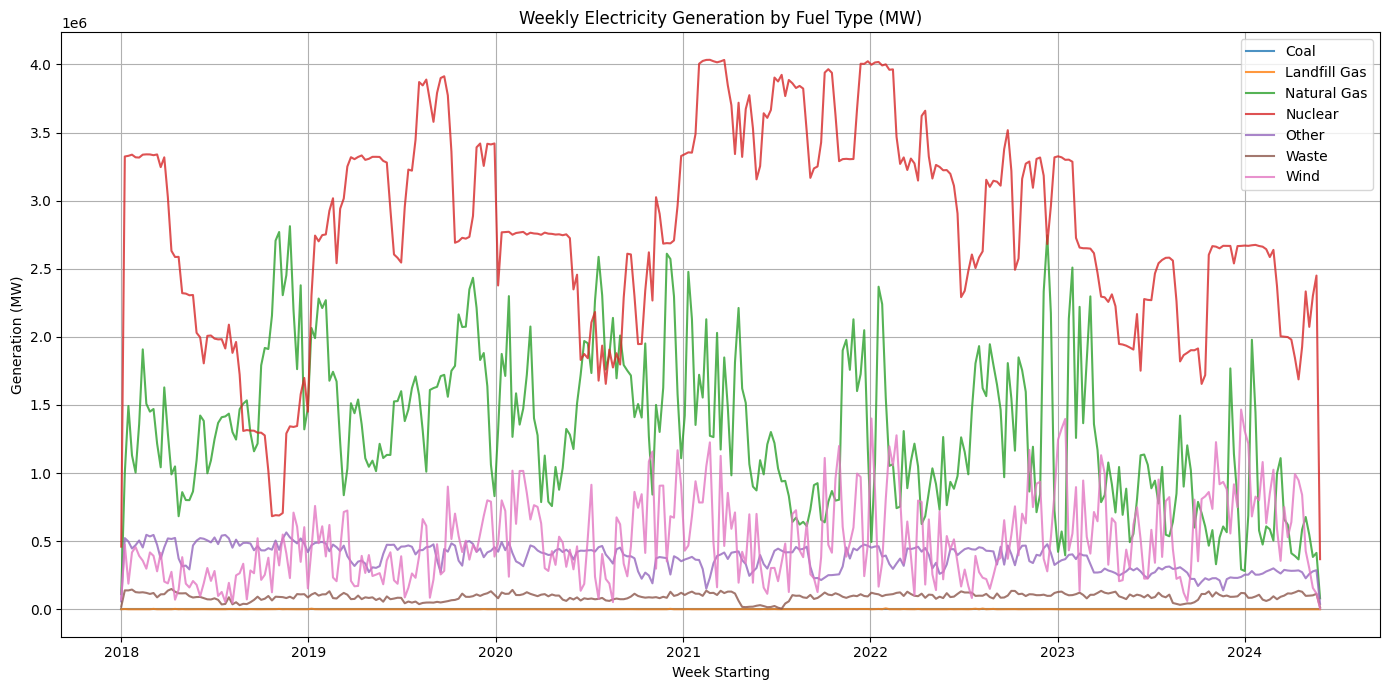

In [39]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime').sort_index()

# 2. Create weekly sums by fuel type
weekly_generation = df.groupby([pd.Grouper(freq='W-MON'), 'fuelcode'])['generatedpower'].sum().unstack().fillna(0)

# 3. Rename columns for readability (adjust based on your actual fuel codes)
fuel_names = {
    'NU': 'Nuclear',
    'NG': 'Natural Gas',
    'CP': 'Coal',
    'LF': 'Landfill Gas',
    'NJ': 'Imports/Exports',
    'WA': 'Waste',
    'WI': 'Wind',
    'SO': 'Solar',
    'HY': 'Hydro'
}

weekly_generation = weekly_generation.rename(columns=fuel_names)

# 4. Plot weekly generation
plt.figure(figsize=(14, 7))
for fuel in weekly_generation.columns:
    plt.plot(weekly_generation.index, weekly_generation[fuel], label=fuel, alpha=0.8)

plt.title('Weekly Electricity Generation by Fuel Type (MW)')
plt.ylabel('Generation (MW)')
plt.xlabel('Week Starting')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()